In [ ]:
! pip install -r requirements.txt

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

def dataset(file_name:str = ''):
  return f'dataset/kdd/{file_name}'

In [2]:
import os

print(os.listdir(dataset()))

['corrected.gz', 'dataset.csv', 'dataset2.csv', 'kddcup.data.gz', 'kddcup.data_10_percent.gz', 'kddcup.names', 'kddcup.newtestdata_10_percent_unlabeled.gz', 'kddcup.testdata.unlabeled.gz', 'kddcup.testdata.unlabeled_10_percent.gz', 'test_dataset.csv', 'test_dataset2.csv', 'training_attack_types', 'typo-correction.txt']


In [3]:
with open(dataset("kddcup.names"),'r') as f:
  names = f.read()
  features = [name.split(':')[0].strip() for name in names.split('.')][1:-1] + ['target']

len(features) , features

(42,
 ['duration',
  'protocol_type',
  'service',
  'flag',
  'src_bytes',
  'dst_bytes',
  'land',
  'wrong_fragment',
  'urgent',
  'hot',
  'num_failed_logins',
  'logged_in',
  'num_compromised',
  'root_shell',
  'su_attempted',
  'num_root',
  'num_file_creations',
  'num_shells',
  'num_access_files',
  'num_outbound_cmds',
  'is_host_login',
  'is_guest_login',
  'count',
  'srv_count',
  'serror_rate',
  'srv_serror_rate',
  'rerror_rate',
  'srv_rerror_rate',
  'same_srv_rate',
  'diff_srv_rate',
  'srv_diff_host_rate',
  'dst_host_count',
  'dst_host_srv_count',
  'dst_host_same_srv_rate',
  'dst_host_diff_srv_rate',
  'dst_host_same_src_port_rate',
  'dst_host_srv_diff_host_rate',
  'dst_host_serror_rate',
  'dst_host_srv_serror_rate',
  'dst_host_rerror_rate',
  'dst_host_srv_rerror_rate',
  'target'])

In [4]:
attack_types = {'normal': 'normal'}
with open(dataset("training_attack_types"),'r') as f:
  types = f.read()
  attack_types.update({t.split(' ')[0]: t.split(' ')[1] for t in types.split('\n')[:-2]})
len(attack_types), attack_types

(23,
 {'normal': 'normal',
  'back': 'dos',
  'buffer_overflow': 'u2r',
  'ftp_write': 'r2l',
  'guess_passwd': 'r2l',
  'imap': 'r2l',
  'ipsweep': 'probe',
  'land': 'dos',
  'loadmodule': 'u2r',
  'multihop': 'r2l',
  'neptune': 'dos',
  'nmap': 'probe',
  'perl': 'u2r',
  'phf': 'r2l',
  'pod': 'dos',
  'portsweep': 'probe',
  'rootkit': 'u2r',
  'satan': 'probe',
  'smurf': 'dos',
  'spy': 'r2l',
  'teardrop': 'dos',
  'warezclient': 'r2l',
  'warezmaster': 'r2l'})

In [5]:
import pandas as pd

df = pd.read_csv(dataset('kddcup.data.gz'),names=features)

df['benign'] = df.target.apply(lambda r: 1 if (r[:-1]=='normal') else 0)
df['Attack Type'] = df.target.apply(lambda r:attack_types[r[:-1]])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,benign,Attack Type
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.,1,normal
1,0,tcp,http,SF,162,4528,0,0,0,0,...,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.,1,normal
2,0,tcp,http,SF,236,1228,0,0,0,0,...,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.,1,normal
3,0,tcp,http,SF,233,2032,0,0,0,0,...,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.,1,normal
4,0,tcp,http,SF,239,486,0,0,0,0,...,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.,1,normal


In [6]:
df.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,benign,Attack Type
4898426,0,tcp,http,SF,212,2288,0,0,0,0,...,0.0,0.33,0.05,0.0,0.01,0.0,0.0,normal.,1,normal
4898427,0,tcp,http,SF,219,236,0,0,0,0,...,0.0,0.25,0.05,0.0,0.01,0.0,0.0,normal.,1,normal
4898428,0,tcp,http,SF,218,3610,0,0,0,0,...,0.0,0.20,0.05,0.0,0.01,0.0,0.0,normal.,1,normal
4898429,0,tcp,http,SF,219,1234,0,0,0,0,...,0.0,0.17,0.05,0.0,0.01,0.0,0.0,normal.,1,normal
4898430,0,tcp,http,SF,219,1098,0,0,0,0,...,0.0,0.14,0.05,0.0,0.01,0.0,0.0,normal.,1,normal


# Visualize Dataset

In [ ]:
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

In [ ]:
print(df['target'].value_counts())
bar_graph('target')

In [ ]:
print(df['Attack Type'].value_counts())
bar_graph('Attack Type')

In [ ]:
df.isnull().sum()

In [ ]:
#Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

In [ ]:
bar_graph('protocol_type')

In [ ]:
plt.figure(figsize=(15,3))
bar_graph('service')

In [ ]:
bar_graph('flag')

In [ ]:
bar_graph('logged_in')

logged_in (1 if successfully logged in; 0 otherwise): We notice that just 70000 packets are successfully logged in.

In [ ]:
len(df.columns)

# Data Cleaning

In [7]:
df = df.dropna(axis='columns')# drop columns with NaN

In [ ]:
{col:df[col].nunique() for col in df}

In [8]:
test_df = pd.read_csv(dataset('corrected.gz'),names=features)

In [9]:
print("Number of duplicate records:", df.duplicated().sum())
df = df.drop_duplicates()
df.shape

Number of duplicate records: 3823439


(1074992, 44)

In [10]:
print("Number of duplicate records:", test_df.duplicated().sum())
test_df = test_df.drop_duplicates()
test_df.shape

Number of duplicate records: 233738


(77291, 42)

In [11]:
df = df[[col for col in df if df[col].nunique() > 1]]

In [12]:
df.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,benign,Attack Type
4898426,0,tcp,http,SF,212,2288,0,0,0,0,...,0.0,0.33,0.05,0.0,0.01,0.0,0.0,normal.,1,normal
4898427,0,tcp,http,SF,219,236,0,0,0,0,...,0.0,0.25,0.05,0.0,0.01,0.0,0.0,normal.,1,normal
4898428,0,tcp,http,SF,218,3610,0,0,0,0,...,0.0,0.20,0.05,0.0,0.01,0.0,0.0,normal.,1,normal
4898429,0,tcp,http,SF,219,1234,0,0,0,0,...,0.0,0.17,0.05,0.0,0.01,0.0,0.0,normal.,1,normal
4898430,0,tcp,http,SF,219,1098,0,0,0,0,...,0.0,0.14,0.05,0.0,0.01,0.0,0.0,normal.,1,normal


In [13]:
set(test_df.target) - set(df.target)

{'apache2.',
 'httptunnel.',
 'mailbomb.',
 'mscan.',
 'named.',
 'processtable.',
 'ps.',
 'saint.',
 'sendmail.',
 'snmpgetattack.',
 'snmpguess.',
 'sqlattack.',
 'udpstorm.',
 'worm.',
 'xlock.',
 'xsnoop.',
 'xterm.'}

In [14]:
attack_types['apache2'] = 'dos'
attack_types['mailbomb'] = 'dos'
attack_types['processtable'] = 'dos'
attack_types['udpstorm'] = 'dos'
attack_types['named'] = 'r2l'
attack_types['sendmail'] = 'r2l'
attack_types['snmpgetattack'] = 'r2l'
attack_types['snmpguess'] = 'r2l'
attack_types['worm'] = 'r2l'
attack_types['xsnoop'] = 'r2l'
attack_types['xlock'] = 'r2l'
attack_types['httptunnel'] = 'u2r'
attack_types['xterm'] = 'u2r'
attack_types['sqlattack'] = 'u2r'
attack_types['ps'] = 'u2r'
attack_types['saint'] = 'probe'
attack_types['mscan'] = 'probe'

In [15]:
test_df['benign'] = test_df.target.apply(lambda r: 1 if (r[:-1]=='normal') else 0)
test_df['Attack Type'] = test_df.target.apply(lambda r:attack_types[r[:-1]])
test_df = test_df[df.columns]
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,benign,Attack Type
0,0,udp,private,SF,105,146,0,0,0,0,...,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.,1,normal
3,0,udp,private,SF,105,146,0,0,0,0,...,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.,0,r2l
4,0,udp,private,SF,105,146,0,0,0,0,...,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.,0,r2l
5,0,udp,private,SF,105,146,0,0,0,0,...,0.00,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.,0,r2l
6,0,udp,domain_u,SF,29,0,0,0,0,0,...,0.30,0.30,0.0,0.0,0.0,0.0,0.0,normal.,1,normal


In [16]:
from sklearn.preprocessing import LabelEncoder

combined_df = pd.concat([df, test_df], ignore_index=True)

label_encoders = {}

string_categorical_columns = ['Attack Type', 'protocol_type', 'flag', 'service', 'target']
for column in string_categorical_columns:
	label_encoders[column] = LabelEncoder()
	combined_df[column] = label_encoders[column].fit_transform(combined_df[column])
	print(column, label_encoders[column].classes_)

df = combined_df.iloc[:len(df)]
test_df = combined_df.iloc[len(df):]

df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

del combined_df

Attack Type ['dos' 'normal' 'probe' 'r2l' 'u2r']
protocol_type ['icmp' 'tcp' 'udp']
flag ['OTH' 'REJ' 'RSTO' 'RSTOS0' 'RSTR' 'S0' 'S1' 'S2' 'S3' 'SF' 'SH']
service ['IRC' 'X11' 'Z39_50' 'aol' 'auth' 'bgp' 'courier' 'csnet_ns' 'ctf'
 'daytime' 'discard' 'domain' 'domain_u' 'echo' 'eco_i' 'ecr_i' 'efs'
 'exec' 'finger' 'ftp' 'ftp_data' 'gopher' 'harvest' 'hostnames' 'http'
 'http_2784' 'http_443' 'http_8001' 'icmp' 'imap4' 'iso_tsap' 'klogin'
 'kshell' 'ldap' 'link' 'login' 'mtp' 'name' 'netbios_dgm' 'netbios_ns'
 'netbios_ssn' 'netstat' 'nnsp' 'nntp' 'ntp_u' 'other' 'pm_dump' 'pop_2'
 'pop_3' 'printer' 'private' 'red_i' 'remote_job' 'rje' 'shell' 'smtp'
 'sql_net' 'ssh' 'sunrpc' 'supdup' 'systat' 'telnet' 'tftp_u' 'tim_i'
 'time' 'urh_i' 'urp_i' 'uucp' 'uucp_path' 'vmnet' 'whois']
target ['apache2.' 'back.' 'buffer_overflow.' 'ftp_write.' 'guess_passwd.'
 'httptunnel.' 'imap.' 'ipsweep.' 'land.' 'loadmodule.' 'mailbomb.'
 'mscan.' 'multihop.' 'named.' 'neptune.' 'nmap.' 'normal.' 'perl.

In [17]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,benign,Attack Type
0,0,1,24,9,215,45076,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,16,1,1
1,0,1,24,9,162,4528,0,0,0,0,...,0.0,1.00,0.0,0.0,0.0,0.0,0.0,16,1,1
2,0,1,24,9,236,1228,0,0,0,0,...,0.0,0.50,0.0,0.0,0.0,0.0,0.0,16,1,1
3,0,1,24,9,233,2032,0,0,0,0,...,0.0,0.33,0.0,0.0,0.0,0.0,0.0,16,1,1
4,0,1,24,9,239,486,0,0,0,0,...,0.0,0.25,0.0,0.0,0.0,0.0,0.0,16,1,1


# Corr

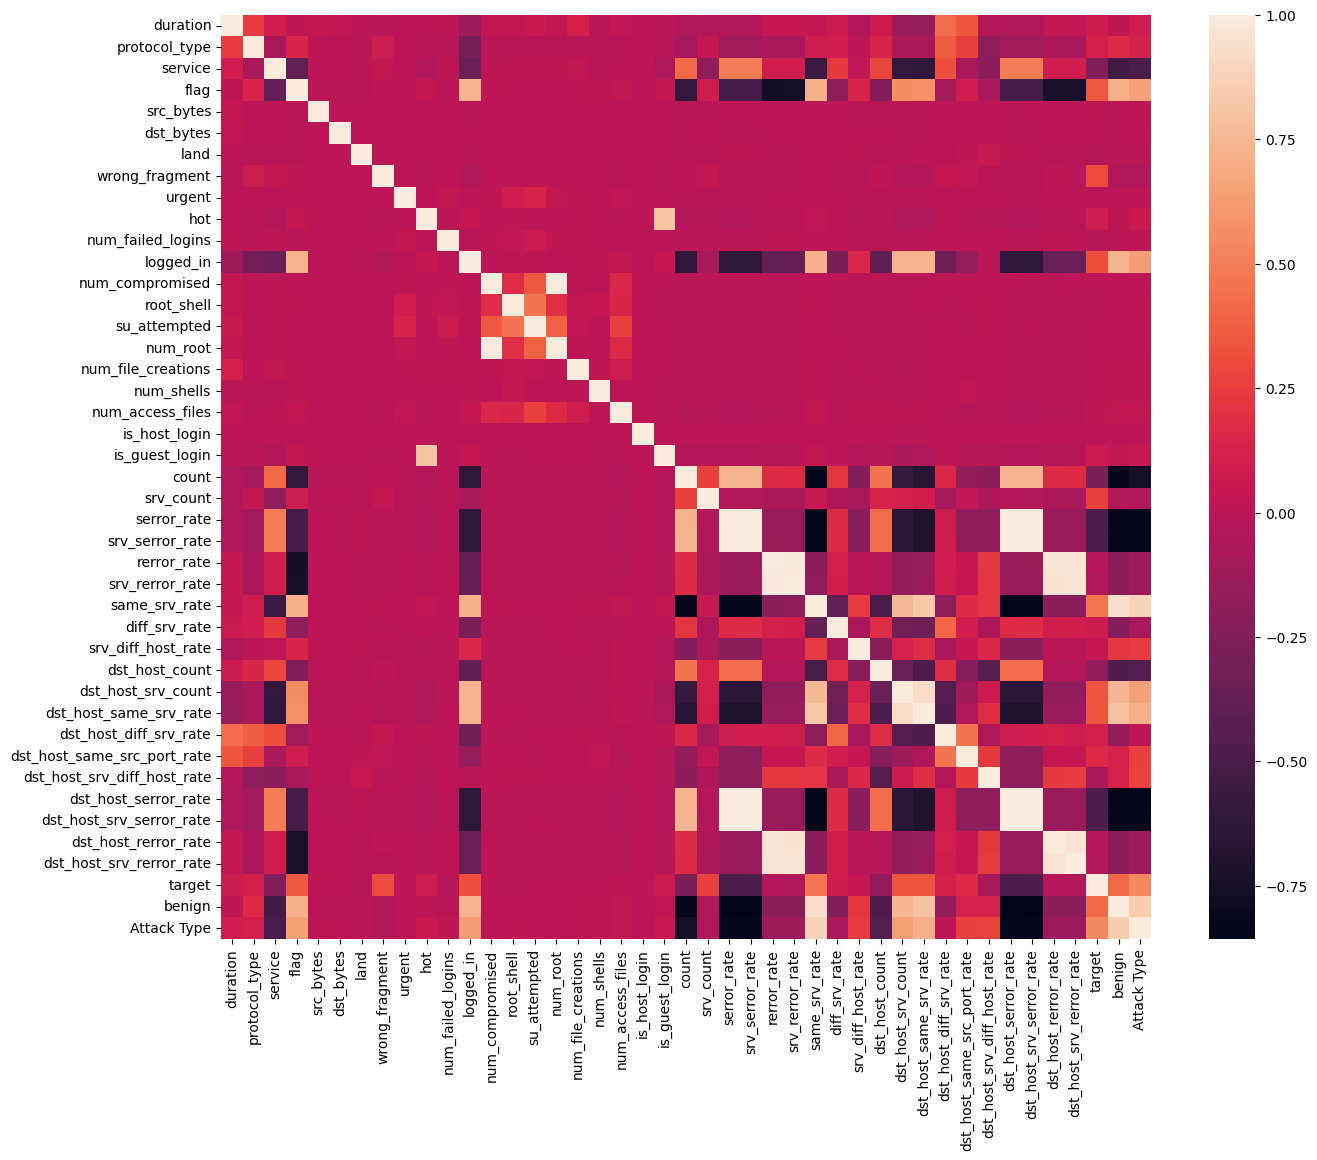

In [18]:
corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()


In [ ]:
corr['target']

In [19]:
label_cols = ['target', 'Attack Type', 'benign']

mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
np.fill_diagonal(mask, True)
corr_matrix = corr.mask(mask)

threshold = 0.95

# Find features with correlation above the threshold
high_corr_features = ((corr_matrix.abs() > threshold) & (corr_matrix != 1)).any()

# Identify and remove redundant features
to_drop = high_corr_features[high_corr_features].index
to_drop = to_drop.drop(label_cols, errors='ignore')
# Drop the redundant features from the DataFrame
df = df.drop(columns=to_drop)
test_df = test_df.drop(columns=to_drop)
len(to_drop), to_drop

(7,
 Index(['num_compromised', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
        'srv_rerror_rate', 'dst_host_serror_rate', 'dst_host_rerror_rate'],
       dtype='object'))

In [ ]:
# print(df.shape)

# for f,value in corr[label_col].items():
#   if abs(value) > 0.6 and f!=label_col:
#     df.drop(f,axis = 1, inplace=True)
#     print('dropped', f)
# df.shape

In [ ]:
df['service'].corr(df[label_cols[0]])

In [ ]:
df.head()

In [20]:
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
df_std

is_host_login                  1.363993e-03
land                           4.917892e-03
urgent                         1.540162e-02
num_failed_logins              1.558112e-02
su_attempted                   1.725250e-02
root_shell                     1.738496e-02
num_shells                     1.864927e-02
dst_host_srv_diff_host_rate    5.636309e-02
is_guest_login                 6.154966e-02
num_access_files               7.347828e-02
wrong_fragment                 8.835986e-02
diff_srv_rate                  1.169086e-01
dst_host_diff_srv_rate         1.310801e-01
dst_host_same_src_port_rate    2.298291e-01
dst_host_srv_rerror_rate       2.609840e-01
num_file_creations             2.650495e-01
srv_diff_host_rate             2.655164e-01
protocol_type                  2.918180e-01
dst_host_srv_serror_rate       3.913478e-01
same_srv_rate                  3.917200e-01
dst_host_same_srv_rate         4.259518e-01
benign                         4.294263e-01
Attack Type                    4

In [21]:
df.to_csv(dataset('dataset2.csv'), index=False)
test_df.to_csv(dataset('test_dataset2.csv'), index=False)

# Load data

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pandas

def dataset(file_name:str = ''):
  return f'dataset/{file_name}'

In [ ]:
df = pandas.read_csv(dataset('dataset2.csv'))
test_df = pandas.read_csv(dataset('test_dataset2.csv'))
df.shape

In [ ]:
test_df.head()

In [ ]:
df.head()

In [22]:
df = df.drop(['Attack Type','target'], axis=1)
test_df = test_df.drop(['Attack Type','target'], axis=1)

In [23]:
label_col = 'benign'
# Y = df[[label_col]]
# X = df.drop([label_col], axis=1)
Y_train = df[[label_col]]
X_train = df.drop([label_col], axis=1)
df = df.drop([label_col], axis=1)

In [24]:
Y_test = test_df[[label_col]]
X_test = test_df.drop([label_col], axis=1)
test_df = test_df.drop([label_col], axis=1)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=273, shuffle=True)
print('Train', X_train.shape, Y_train.shape)
print('Validation', X_val.shape, Y_val.shape)
print('Test', X_test.shape, Y_test.shape)

Train (967492, 33) (967492, 1)
Validation (107500, 33) (107500, 1)
Test (77291, 33) (77291, 1)


In [26]:
def fit(model):
  name = type(model).__name__
  start_time = time.time()
  model.fit(X_train, Y_train.values.ravel())
  end_time = time.time()
  print(f"{name}: Training time: ",end_time-start_time)

def fit_evaluate(model):
  name = type(model).__name__
  fit(model)

  start_time = time.time()
  Y_test_pred = model.predict(X_test)
  end_time = time.time()
  print(f"{name}: Testing time: ",end_time-start_time)

  print(f"{name}: Train score is:", model.score(X_train, Y_train))
  print(f"{name}: Validation score is:", model.score(X_val,Y_val))
  print(f"{name}: Test score is:", model.score(X_test,Y_test))


In [27]:
from sklearn.naive_bayes import GaussianNB
fit_evaluate(GaussianNB())

GaussianNB: Training time:  0.3018319606781006
GaussianNB: Testing time:  0.013406753540039062
GaussianNB: Train score is: 0.9794406568736486
GaussianNB: Validation score is: 0.978753488372093
GaussianNB: Test score is: 0.9239238721196517


In [28]:
from sklearn.tree import DecisionTreeClassifier
fit_evaluate(DecisionTreeClassifier(criterion="entropy", max_depth = 6))

DecisionTreeClassifier: Training time:  2.482048988342285
DecisionTreeClassifier: Testing time:  0.0
DecisionTreeClassifier: Train score is: 0.9975679385462619
DecisionTreeClassifier: Validation score is: 0.9974046511627906
DecisionTreeClassifier: Test score is: 0.9375735855403604


In [29]:
from sklearn.svm import SVC
fit_evaluate(SVC(gamma = 'scale'))

SVC: Training time:  830.7168369293213
SVC: Testing time:  42.44450831413269
SVC: Train score is: 0.9973116056773597
SVC: Validation score is: 0.997339534883721
SVC: Test score is: 0.9256963941467958


In [30]:
from sklearn.linear_model import LogisticRegression
fit_evaluate(LogisticRegression(max_iter=1200000))

LogisticRegression: Training time:  1.5472776889801025
LogisticRegression: Testing time:  0.005089759826660156
LogisticRegression: Train score is: 0.9928237132710142
LogisticRegression: Validation score is: 0.992753488372093
LogisticRegression: Test score is: 0.91024828246497


In [31]:
from sklearn.ensemble import GradientBoostingClassifier
fit_evaluate(GradientBoostingClassifier(random_state=220))

GradientBoostingClassifier: Training time:  196.0295000076294
GradientBoostingClassifier: Testing time:  0.06200075149536133
GradientBoostingClassifier: Train score is: 0.9983741467629706
GradientBoostingClassifier: Validation score is: 0.9983348837209303
GradientBoostingClassifier: Test score is: 0.9230311420475864


In [32]:
from sklearn.ensemble import RandomForestClassifier
fit_evaluate(RandomForestClassifier(n_estimators=30))

RandomForestClassifier: Training time:  29.732511281967163
RandomForestClassifier: Testing time:  0.0970914363861084
RandomForestClassifier: Train score is: 0.9999648575905538
RandomForestClassifier: Validation score is: 0.9996744186046511
RandomForestClassifier: Test score is: 0.9259680946035114


In [33]:
from sklearn.ensemble import AdaBoostClassifier
fit_evaluate(AdaBoostClassifier(random_state=387))

c:\Users\rezaab\Projects\IntrusionDetection-KDD\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier: Training time:  55.725242614746094
AdaBoostClassifier: Testing time:  0.5748329162597656
AdaBoostClassifier: Train score is: 0.9964960950581504
AdaBoostClassifier: Validation score is: 0.996353488372093
AdaBoostClassifier: Test score is: 0.9195766648122032


# NN

In [34]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, BatchNormalization
from scikeras.wrappers import KerasClassifier
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam
from keras.metrics import Accuracy
import gc

keras.backend.clear_session()

try:
  del kerasModel
  gc.collect()
  del ann
  gc.collect()
except:
  pass

kerasModel = Sequential(
	[
		Input(shape=(X_train.shape[1],)),
		Dense(64, activation='relu', kernel_initializer='he_uniform'),
    	BatchNormalization(),
    	Dropout(0.5),
		Dense(32, activation='relu', kernel_initializer='he_uniform'),
    	BatchNormalization(),
    	Dropout(0.5),
		Dense(2, activation='softmax')
	]
)

kerasModel.compile(optimizer = 'adam', loss='categorical_crossentropy',metrics = ['accuracy'])

kerasModel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,706 (18.38 KB)

 Trainable params: 4,514 (17.63 KB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
Y_train.shape

In [35]:
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# ann = KerasClassifier(model=kerasModel, epochs=10, batch_size=64)
Y_train_one_hot = to_categorical(Y_train, num_classes=2)
Y_val_one_hot = to_categorical(Y_val, num_classes=2)
Y_test_one_hot = to_categorical(Y_test, num_classes=2)

early_stopping = EarlyStopping(
    monitor='val_loss', 
    min_delta=0.0001, 
    patience=10, 
    verbose=1, 
    mode='min', 
    restore_best_weights=True
)


start_time = time.time()
kerasModel.fit(X_train, Y_train_one_hot, 
               validation_data=(X_val, Y_val_one_hot), 
               epochs=100,
               batch_size=64, 
               callbacks=[early_stopping])
end_time = time.time()
print(f"ANN: Training time: ",end_time-start_time)

ann_train_pred = kerasModel.predict(X_train)
ann_val_pred = kerasModel.predict(X_val)
ann_test_pred = kerasModel.predict(X_test)

ann_train_pred_scalar = np.argmax(ann_train_pred, axis=1)
ann_val_pred_scalar = np.argmax(ann_val_pred, axis=1)
ann_test_pred_scalar = np.argmax(ann_test_pred, axis=1)

print('Train accuracy:', accuracy_score(Y_train,ann_train_pred_scalar))
print('Val accuracy:', accuracy_score(Y_val,ann_val_pred_scalar))
print('Test accuracy:', accuracy_score(Y_test,ann_test_pred_scalar))

Epoch 1/100
15118/15118 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 0.9856 - loss: 0.0494 - val_accuracy: 0.9967 - val_loss: 0.0117
Epoch 2/100
15118/15118 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9960 - loss: 0.0163 - val_accuracy: 0.9972 - val_loss: 0.0087
Epoch 3/100
15118/15118 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - accuracy: 0.9962 - loss: 0.0134 - val_accuracy: 0.9972 - val_loss: 0.0071
Epoch 4/100
15118/15118 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - accuracy: 0.9966 - loss: 0.0117 - val_accuracy: 0.9975 - val_loss: 0.0061
Epoch 5/100
15118/15118 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9970 - loss: 0.0103 - val_accuracy: 0.9983 - val_loss: 0.0059
Epoch 6/100
15118/15118 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9970 - loss: 0.0104 - val_accuracy: 0.9976 - val_loss: 0.0058
Epoch 7/100
15118/15118 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9969 - loss: 0.0105 - val_accuracy: 0.9982 - val_loss: 0.0057
Epoch 8/100
15118/15118 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - ac